In [44]:
import pandas as pd
import scipy as sc
import sklearn as sl
import pickle as pk
import csv
import numpy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
%matplotlib inline

In [2]:
df=pd.read_csv('diamonds.csv')
df['volume']=df['x']*df['y']*df['z']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


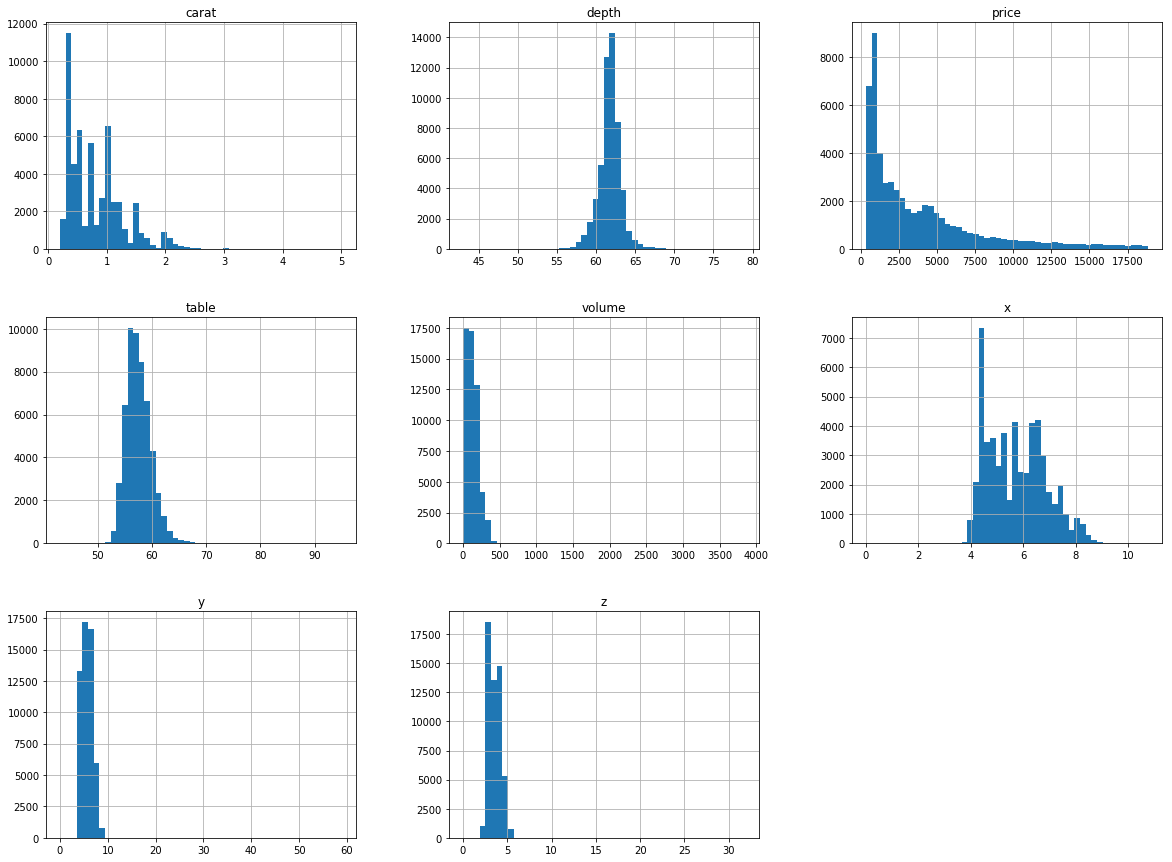

In [3]:
df.hist(bins=50,figsize=(20,15))
plt.show()

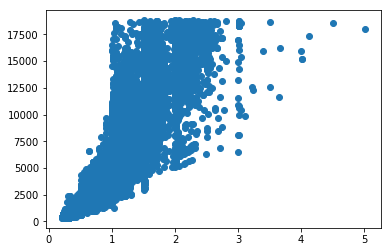

In [4]:
plt.scatter(df['carat'],df['price'])

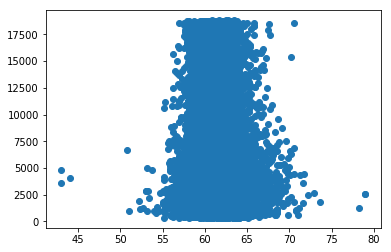

In [5]:
plt.scatter(df['depth'],df['price'])

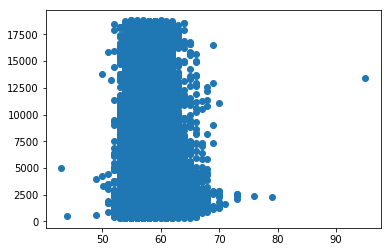

In [6]:
plt.scatter(df['table'],df['price'])

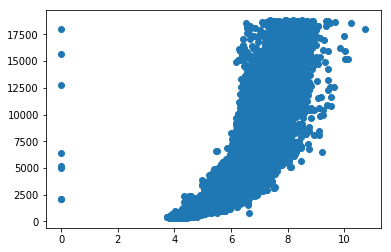

In [7]:
plt.scatter(df['x'],df['price'])

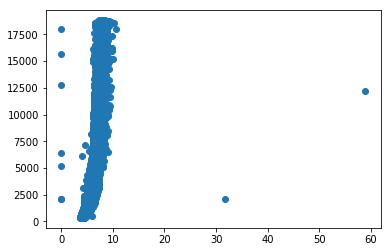

In [8]:
plt.scatter(df['y'],df['price'])

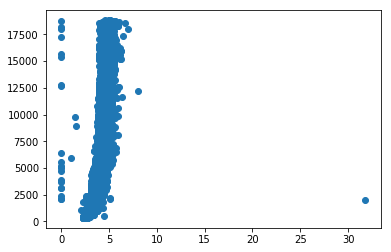

In [9]:
plt.scatter(df['z'],df['price'])

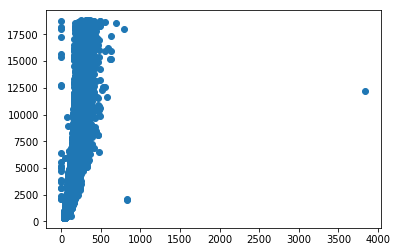

In [10]:
plt.scatter(df['volume'],df['price'])

In [11]:
cor=df.corr()
cor

,carat,depth,table,price,x,y,z,volume
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.976308
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,0.009157
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.167400
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,0.902385
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.956564
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.975143
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.950065
volume,0.976308,0.009157,0.167400,0.902385,0.956564,0.975143,0.950065,1.000000


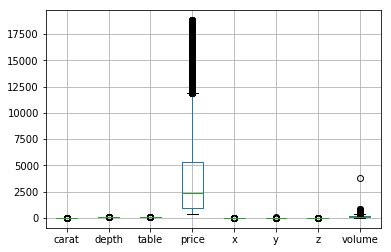

In [12]:
df.boxplot()

In [13]:
inliers=df[(numpy.abs(df['price']-df['price'].mean())<(3*df['price'].std()))]
inliers.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [14]:
numerical=inliers[['carat','x','y','z']]
numerical.head()

,carat,x,y,z
0,0.23,3.95,3.98,2.43
1,0.21,3.89,3.84,2.31
2,0.23,4.05,4.07,2.31
3,0.29,4.20,4.23,2.63
4,0.31,4.34,4.35,2.75


In [15]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(numerical)
df_normalized = pd.DataFrame(np_scaled,columns=numerical.columns)
df_normalized.head()

,carat,x,y,z
0,0.007874,0.389546,0.067572,0.076415
1,0.002625,0.383629,0.065195,0.072642
2,0.007874,0.399408,0.069100,0.072642
3,0.023622,0.414201,0.071817,0.082704
4,0.028871,0.428008,0.073854,0.086478


In [16]:
category=inliers[['cut','color','clarity']]
categorical = pd.get_dummies(category)
categorical.head()

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [17]:
feature=inliers[['price','carat','x','y','z']].join(categorical)
feature.head()

,price,carat,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,326,0.23,3.95,3.98,2.43,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,326,0.21,3.89,3.84,2.31,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,327,0.23,4.05,4.07,2.31,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,334,0.29,4.20,4.23,2.63,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,335,0.31,4.34,4.35,2.75,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [18]:
feature_norm=df_normalized.join(categorical)
feature_norm.head()

,carat,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.007874,0.389546,0.067572,0.076415,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.002625,0.383629,0.065195,0.072642,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.007874,0.399408,0.069100,0.072642,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.023622,0.414201,0.071817,0.082704,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.028871,0.428008,0.073854,0.086478,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [19]:
feature_norm=feature_norm.join(feature['price'])
feature_norm.head()

,carat,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,0.007874,0.389546,0.067572,0.076415,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,326.0
1,0.002625,0.383629,0.065195,0.072642,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,326.0
2,0.007874,0.399408,0.069100,0.072642,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,327.0
3,0.023622,0.414201,0.071817,0.082704,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,334.0
4,0.028871,0.428008,0.073854,0.086478,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,335.0


In [20]:
shuffled_indices = numpy.random.permutation(len(feature))
shuffled_indices

array([ 6334, 50305, 15285, ...,   345,  8538,  4168])

In [21]:
ds=int(len(feature)*0.1)
ds

5273

In [22]:
test_indices = shuffled_indices[:ds]
test = feature.iloc[test_indices]
test.head()

,price,carat,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
6334,4032,1.00,6.51,6.40,3.94,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
51511,2383,0.70,5.73,5.69,3.49,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
15285,6133,1.09,6.55,6.59,4.12,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
44744,1619,0.56,5.35,5.42,3.28,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
28822,683,0.41,4.69,4.74,3.01,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [23]:
test_indices_norm = shuffled_indices[:ds]
test_norm = feature_norm.iloc[test_indices_norm]
test_norm.head()

,carat,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
6334,0.209974,0.642012,0.108659,0.123899,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4032.0
50305,0.131234,0.565089,0.096604,0.109748,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,544.0
15285,0.233596,0.645957,0.111885,0.129560,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6133.0
43538,0.094488,0.527613,0.092020,0.103145,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1427.0
27616,0.055118,0.462525,0.080475,0.094654,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
train_indices = shuffled_indices[ds:]
train = feature.iloc[train_indices]
train.head()

,price,carat,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
13592,5560,1.01,6.39,6.46,3.92,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
21749,9818,1.55,7.41,7.47,4.58,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
48493,1981,0.66,5.60,5.57,3.45,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
44131,1560,0.46,4.98,5.01,3.04,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
23961,12098,1.56,7.30,7.35,4.64,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [25]:
train_indices_norm = shuffled_indices[ds:]
train_norm = feature_norm.iloc[train_indices_norm]
train_norm.head()

,carat,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
13592,0.212598,0.630178,0.109677,0.123270,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5560.0
21749,0.354331,0.730769,0.126825,0.144025,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9818.0
47287,0.120735,0.552268,0.094567,0.108491,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,394.0
42925,0.068241,0.491124,0.085059,0.095597,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1364.0
23961,0.356955,0.719921,0.124788,0.145912,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12098.0


In [26]:
lin_reg = LinearRegression()
lin_reg.fit(train.drop(['price'],axis=1),train['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
lin_reg.coef_

array([10162.28191696,  -581.25231664,    40.09607767,  -319.19289211,
        -592.52185211,   -29.21094247,   297.59628102,   177.25763434,
         146.87887922,   740.11303416,   552.81384589,   489.22848961,
         313.22227389,  -153.25557341,  -598.23322589, -1343.88884426,
       -3535.6549563 ,  1363.06549736,  -145.58519832, -1045.58802954,
         706.4598255 ,   429.23122081,  1123.22977362,  1104.84186687])

In [28]:
prediction = lin_reg.predict(test.drop(['price'],axis=1))
prediction

array([3801.02965091, 2220.89330032, 6556.25855042, ...,  101.43325294,
        257.40125071, 2596.1391855 ])

In [29]:
mean_square = mean_squared_error(test['price'],prediction)
root_mean_square = numpy.sqrt(mean_square)
root_mean_square

1006.1653919912576

In [30]:
train_norm=train_norm.fillna(0)
test_norm=test_norm.fillna(0)

In [31]:
lin_reg_norm = LinearRegression()
lin_reg_norm.fit(train_norm.drop(['price'],axis=1),train_norm['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
prediction_norm = lin_reg.predict(test_norm.drop(['price'],axis=1))
mean_square_norm = mean_squared_error(test_norm['price'],prediction_norm)
root_mean_square_norm = numpy.sqrt(mean_square_norm)
root_mean_square_norm

3793.1321296073907

In [33]:
df['price'].mean()

3932.799721913237

In [34]:
regressor_ridge=Ridge(alpha=0.1)
regressor_ridge.fit(train.drop(['price'],axis=1),train['price'])

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [35]:
pred_ridge=regressor_ridge.predict(test.drop(['price'],axis=1))
mean_square = mean_squared_error(test['price'],pred_ridge)
rmse_ridge = numpy.sqrt(mean_square)
rmse_ridge

1006.149380473154

In [36]:
regressor_ridge.coef_

array([10159.4319355 ,  -580.42344532,    40.07986383,  -318.70696514,
        -592.51802834,   -29.21163203,   297.58480157,   177.25580935,
         146.88904955,   740.04773691,   552.75575944,   489.15862423,
         313.18622039,  -153.25034744,  -598.17076881, -1343.72722499,
       -3535.00212681,  1362.93774414,  -145.69745305, -1045.63537817,
         706.34690931,   429.13490445,  1123.15785845,  1104.75754181])

In [37]:
regressor= Lasso(random_state=0,alpha=.5)
regressor.fit(train.drop(['price'],axis=1),train['price'])

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)

In [38]:
pred_lasso=regressor.predict(test.drop(['price'],axis=1))
mean_square = mean_squared_error(test['price'],pred_lasso)
rmse = numpy.sqrt(mean_square)
rmse

1005.1543703940267

In [39]:
regressor.coef_

array([10060.97113324,  -548.13859509,    26.05141897,  -289.39171959,
        -729.66029714,  -172.39615305,   149.39709817,    27.28859269,
           0.        ,   419.88556068,   234.49269003,   171.11523809,
           0.        ,  -462.55600702,  -903.66445381, -1642.89212529,
       -4019.79416808,   822.99602201,  -669.29550132, -1565.46310565,
         176.96869198,   -93.51980988,   591.56240042,   575.28951309])

In [40]:
X = train.drop(['price'],axis=1)
vector = train['price']
predict= test.drop(['price'],axis=1)

In [41]:
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
predict_ = poly.fit_transform(predict)

In [42]:
clf = linear_model.LinearRegression()
clf.fit(X_, vector)
predict_poly=clf.predict(predict_)
predict_poly

array([3671.08543396, 2011.52684021, 6990.76902771, ...,  534.9203949 ,
        290.52244568, 2069.52537537])

In [43]:
mean_square_poly = mean_squared_error(test['price'],predict_poly)
rmse_poly = numpy.sqrt(mean_square_poly)
rmse_poly

3152.42280637027